# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.shape
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [5]:
df0 = df0.drop_duplicates()

Use `.describe()`.

In [6]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [7]:
# Check the format of the data
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0[['tpep_pickup_datetime','tpep_dropoff_datetime']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 354.8 KB


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
### YOUR CODE HERE ###
# Calculate duration in minutes by taking the difference between dropoff and pickup times
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds() / 60


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

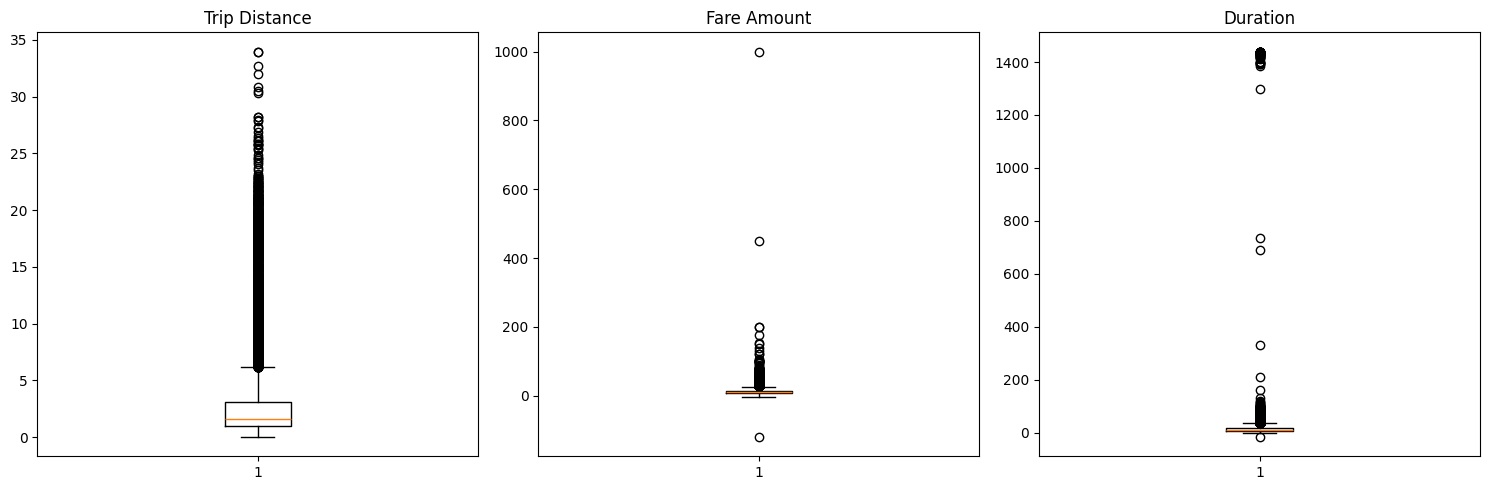

In [10]:
### YOUR CODE HERE ###
# Create box plots for trip_distance, fare_amount, and duration
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(df0['trip_distance'])
plt.title('Trip Distance')

plt.subplot(1,3,2)
plt.boxplot(df0['fare_amount'])
plt.title('Fare Amount')

plt.subplot(1,3,3)
plt.boxplot(df0['duration'])
plt.title('Duration')

plt.tight_layout()
plt.show()



### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
# Sort trip_distance values and get unique values
sorted_distances = sorted(df0['trip_distance'].unique())

# Display 10 smallest unique trip distances
print("10 smallest unique trip distances:")
print(sorted_distances[:10])


10 smallest unique trip distances:
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [12]:
### YOUR CODE HERE ###
# Count rides where trip_distance is zero
zero_distance_count = (df0['trip_distance'] == 0).sum()
print(f"Number of rides with zero distance: {zero_distance_count}")


Number of rides with zero distance: 148


#### `fare_amount` outliers

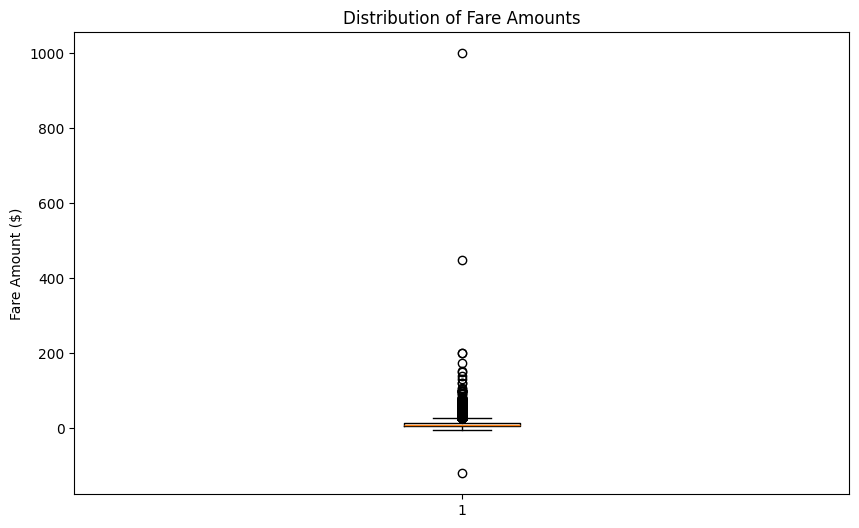


Summary statistics for fare_amount:
count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Outlier thresholds:
Lower bound: $-5.50
Upper bound: $26.50

Number of fare amount outliers: 2064

Shape of dataset after removing outliers: (20635, 19)


In [13]:
### YOUR CODE HERE ###
# Create a boxplot to visualize fare_amount outliers
plt.figure(figsize=(10,6))
plt.boxplot(df0['fare_amount'])
plt.title('Distribution of Fare Amounts')
plt.ylabel('Fare Amount ($)')
plt.show()

# Get summary statistics of fare_amount
print("\nSummary statistics for fare_amount:")
print(df0['fare_amount'].describe())

# Calculate IQR
Q1 = df0['fare_amount'].quantile(0.25)
Q3 = df0['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

# Print thresholds
print(f"\nOutlier thresholds:")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")

# Count outliers
outliers = df0[(df0['fare_amount'] < lower_bound) | (df0['fare_amount'] > upper_bound)]
print(f"\nNumber of fare amount outliers: {len(outliers)}")

# Drop outliers
df0 = df0[(df0['fare_amount'] >= lower_bound) & (df0['fare_amount'] <= upper_bound)]
print(f"\nShape of dataset after removing outliers: {df0.shape}")


**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

Now impute the maximum value as `Q3 + (6 * IQR)`.

#### `duration` outliers


In [14]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
# Get summary statistics for duration
print("\nSummary statistics for duration:")
print(df0['duration'].describe())

# Calculate IQR for duration
Q1_dur = df0['duration'].quantile(0.25)
Q3_dur = df0['duration'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur

# Define outlier thresholds
lower_bound_dur = Q1_dur - 1.5 * IQR_dur
upper_bound_dur = Q3_dur + 1.5 * IQR_dur

# Print thresholds
print(f"\nOutlier thresholds:")
print(f"Lower bound: {lower_bound_dur:.2f}")
print(f"Upper bound: {upper_bound_dur:.2f}")

# Count outliers
outliers_dur = df0[(df0['duration'] < lower_bound_dur) | (df0['duration'] > upper_bound_dur)]
print(f"\nNumber of duration outliers: {len(outliers_dur)}")

# Drop outliers
df0 = df0[(df0['duration'] >= lower_bound_dur) & (df0['duration'] <= upper_bound_dur)]
print(f"\nShape of dataset after removing outliers: {df0.shape}")



Summary statistics for duration:
count    20635.000000
mean        14.421346
std         60.082780
min          0.000000
25%          6.333333
50%         10.350000
75%         15.866667
max       1439.550000
Name: duration, dtype: float64

Outlier thresholds:
Lower bound: -7.97
Upper bound: 30.17

Number of duration outliers: 569

Shape of dataset after removing outliers: (20066, 19)


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [16]:
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [17]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]
# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

,trip_distance
pickup_dropoff,
1 1,0.0000
100 100,0.3775
100 107,1.1800
100 113,2.0240
100 114,1.9400


1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [20]:
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0[(df0['PULocationID']==100) & (df0['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.406
4909,3.406
16636,3.406
19761,3.406
20581,3.406


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [21]:
df = df0

In [22]:
### YOUR CODE HERE ###
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,17.91
4909,17.91
16636,17.91
19761,17.91
20581,17.91


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [23]:
# Create 'day' col
### YOUR CODE HERE ###
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
# Create 'month' col
### YOUR CODE HERE ###

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [24]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###

In [25]:
### YOUR CODE HERE ###
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [26]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

C:\Users\mason\AppData\Local\Temp\ipykernel_31196\2737341177.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.406000,17.910000,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.160000,22.054167,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.0,0.3,12.36,8.000000,161 236,2.052258,11.855376,saturday,mar,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

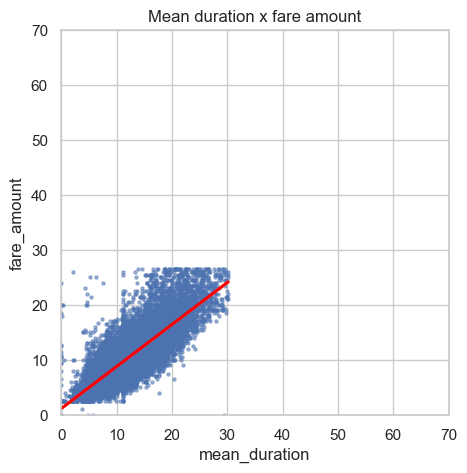

In [27]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [28]:
### YOUR CODE HERE ###
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

Series([], Name: count, dtype: int64)

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [29]:
### YOUR CODE HERE ###
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20066 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         20066 non-null  int64  
 1   passenger_count  20066 non-null  int64  
 2   fare_amount      20066 non-null  float64
 3   mean_distance    20066 non-null  float64
 4   mean_duration    20066 non-null  float64
 5   rush_hour        20066 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

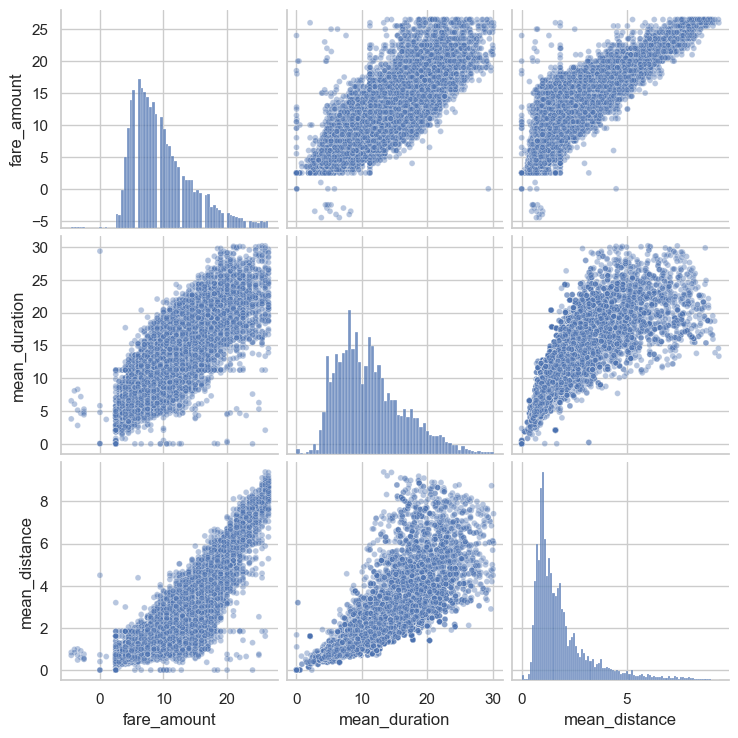

In [30]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [31]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.269300,-0.000146,0.011232,0.002892,-0.004089
passenger_count,0.269300,1.000000,0.011478,0.013475,0.014199,-0.027174
fare_amount,-0.000146,0.011478,1.000000,0.863265,0.825647,-0.026225
mean_distance,0.011232,0.013475,0.863265,1.000000,0.804161,-0.071316
mean_duration,0.002892,0.014199,0.825647,0.804161,1.000000,-0.036246
rush_hour,-0.004089,-0.027174,-0.026225,-0.071316,-0.036246,1.000000


Visualize a correlation heatmap of the data.

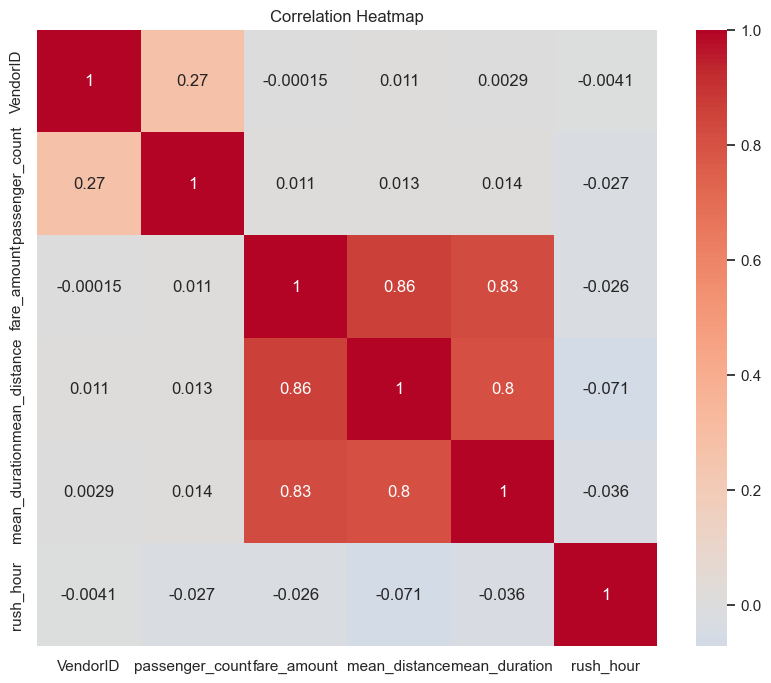

In [32]:
# Create correlation heatmap
### YOUR CODE HERE ###
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [33]:
### YOUR CODE HERE ###
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.406000,17.910000,0
1,1,1,3.160000,22.054167,0
2,1,1,0.881429,7.250000,1
4,2,1,4.435000,14.616667,0
5,2,6,2.052258,11.855376,0


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

### Task 8b. Pre-process data


Dummy encode categorical variables

In [34]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.406000,17.910000,0,True
1,1,3.160000,22.054167,0,False
2,1,0.881429,7.250000,1,False
4,1,4.435000,14.616667,0,True
5,6,2.052258,11.855376,0,True


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [35]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [36]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[ 0.27826566  0.14972314  0.64959888 -0.65304215 -1.11990079]
 [-0.49828517  0.38395995  1.56457589  1.53129472 -1.11990079]
 [-0.49828517  0.02487964  0.14879021  1.53129472 -1.11990079]
 ...
 [ 1.83136734 -0.52650617 -0.52019313  1.53129472  0.89293624]
 [-0.49828517  0.49805621  1.00972669  1.53129472  0.89293624]
 [-0.49828517 -0.83585557 -0.8748496  -0.65304215 -1.11990079]]


### Fit the model

Instantiate your model and fit it to the training data.

In [37]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [38]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.7949834828370493
R^2: 0.7949834828370493
MAE: 1.5593126557579378
MSE: 4.583272950899898
RMSE: 2.1408579940995383


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [39]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [40]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))



Coefficient of determination: 0.7947356878702645
R^2: 0.7947356878702645
MAE: 1.5484193496464902
MSE: 4.562850278556512
RMSE: 2.1360829287638885


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [41]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()


,actual,predicted,residual
12104,9.0,7.288815,1.711185
13554,4.0,4.517570,-0.517570
14634,13.0,7.787269,5.212731
4446,5.5,6.357408,-0.857408
3335,4.5,4.886167,-0.386167


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

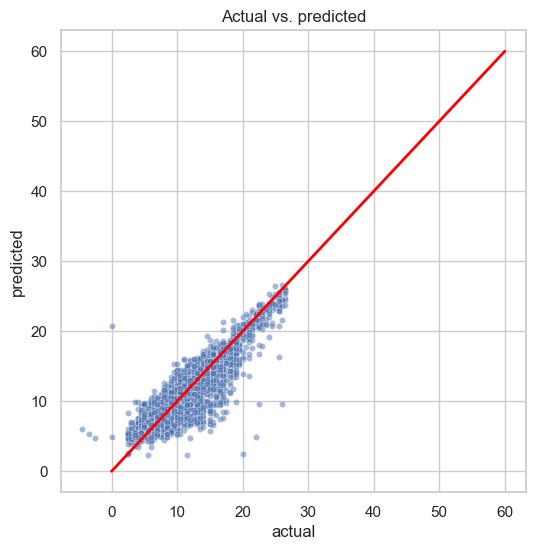

In [42]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

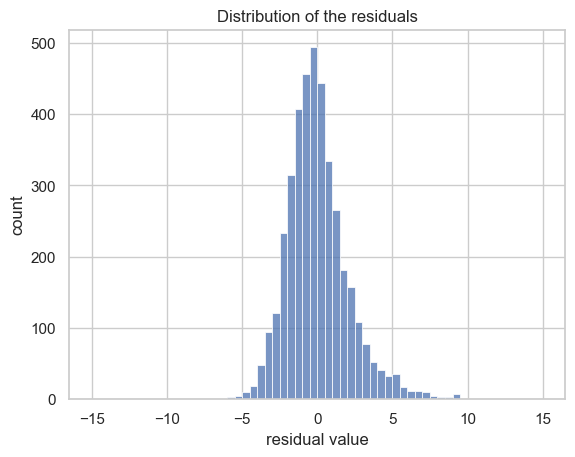

In [43]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');


In [44]:
# Calculate residual mean
results['residual'].mean()

0.01744230815042891

Create a scatterplot of `residuals` over `predicted`.

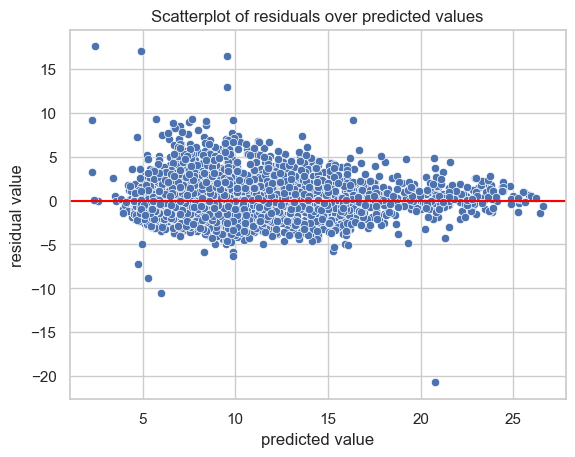

In [45]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [46]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.006257,2.684458,1.749542,0.131876,-0.038344


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 

##Bonus XGBoost Model

In [47]:
df1=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [48]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1[['tpep_pickup_datetime','tpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 354.8 KB


In [49]:
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

In [50]:
df1 = df1.drop_duplicates()

In [51]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


In [52]:
# Create dummy variables for categorical columns
df2 = pd.get_dummies(df1, columns=['RatecodeID', 'VendorID', 'payment_type'], 
                     prefix=['ratecode', 'vendor', 'payment'])


In [53]:
df2.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,extra,...,ratecode_3,ratecode_4,ratecode_5,ratecode_99,vendor_1,vendor_2,payment_1,payment_2,payment_3,payment_4
0,24870114,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,N,100,231,13.0,0.0,...,False,False,False,False,False,True,True,False,False,False
1,35634249,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,N,186,43,16.0,0.0,...,False,False,False,False,True,False,True,False,False,False
2,106203690,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,N,262,236,6.5,0.0,...,False,False,False,False,True,False,True,False,False,False
3,38942136,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,N,188,97,20.5,0.0,...,False,False,False,False,False,True,True,False,False,False
4,30841670,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,N,4,112,16.5,0.5,...,False,False,False,False,False,True,False,True,False,False


In [54]:
df2.columns

Index(['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'duration', 'ratecode_1', 'ratecode_2', 'ratecode_3', 'ratecode_4',
       'ratecode_5', 'ratecode_99', 'vendor_1', 'vendor_2', 'payment_1',
       'payment_2', 'payment_3', 'payment_4'],
      dtype='object')

In [55]:
# Drop specified columns
df2 = df2.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 
                'PULocationID', 'DOLocationID'], axis=1)

# Drop NA values and duplicates
df2 = df2.dropna()
df2 = df2.drop_duplicates()


In [56]:
df2.head()

,Unnamed: 0,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,ratecode_3,ratecode_4,ratecode_5,ratecode_99,vendor_1,vendor_2,payment_1,payment_2,payment_3,payment_4
0,24870114,6,3.34,13.0,0.0,0.5,2.76,0.0,0.3,16.56,...,False,False,False,False,False,True,True,False,False,False
1,35634249,1,1.80,16.0,0.0,0.5,4.00,0.0,0.3,20.80,...,False,False,False,False,True,False,True,False,False,False
2,106203690,1,1.00,6.5,0.0,0.5,1.45,0.0,0.3,8.75,...,False,False,False,False,True,False,True,False,False,False
3,38942136,1,3.70,20.5,0.0,0.5,6.39,0.0,0.3,27.69,...,False,False,False,False,False,True,True,False,False,False
4,30841670,1,4.37,16.5,0.5,0.5,0.00,0.0,0.3,17.80,...,False,False,False,False,False,True,False,True,False,False


In [57]:
# Get continuous columns except fare_amount
continuous_cols = ['passenger_count', 'trip_distance', 'extra', 'mta_tax', 
                  'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

# Calculate z-scores for each continuous column
z_scores = pd.DataFrame()
for col in continuous_cols:
    z_scores[col] = np.abs((df2[col] - df2[col].mean()) / df2[col].std())

# Create mask for rows to keep (z-score between -4 and 4 for all columns)
mask = (z_scores < 4).all(axis=1)

# Filter dataframe to keep only non-outlier rows
df2 = df2[mask]


In [59]:
import xgboost as xgb

# Separate target variable and features
y = df2['fare_amount']
X = df2.drop('fare_amount', axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


Model Performance Metrics:
R-squared: 0.9985
Adjusted R-squared: 0.9985
Mean Squared Error: 0.1109
Root Mean Squared Error: 0.3329


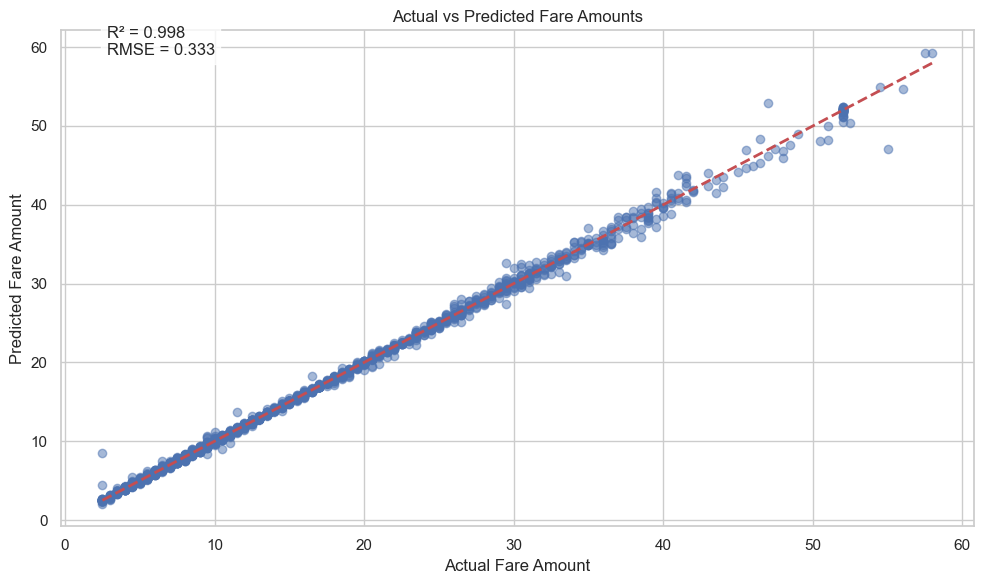

In [61]:
# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount') 
plt.title('Actual vs Predicted Fare Amounts')

# Add text box with metrics
metrics_text = f'R² = {r2:.3f}\nRMSE = {rmse:.3f}'
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


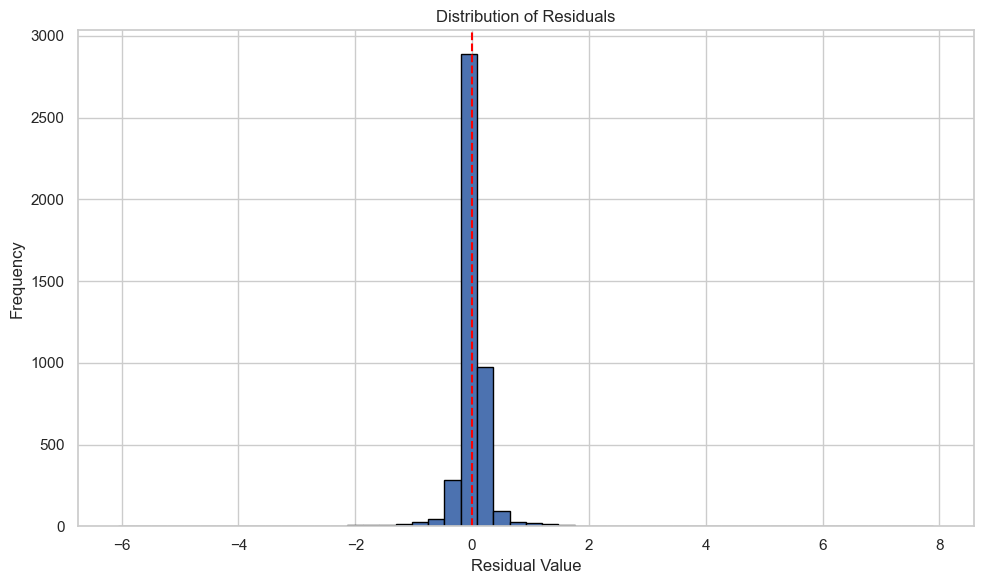

In [62]:
# Calculate residuals
residuals = y_test - y_pred

# Create histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Add vertical line at x=0
plt.axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


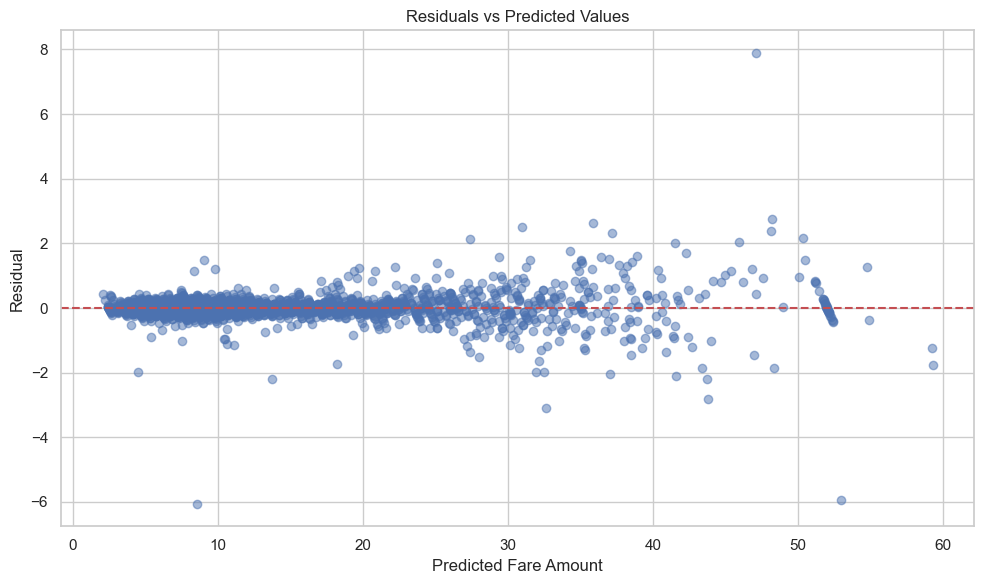

In [63]:
# Create scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Predicted Fare Amount')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()


Number of features (X.columns): 22
Number of coefficients (lr.coef_): 5

Features: ['Unnamed: 0', 'passenger_count', 'trip_distance', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration', 'ratecode_1', 'ratecode_2', 'ratecode_3', 'ratecode_4', 'ratecode_5', 'ratecode_99', 'vendor_1', 'vendor_2', 'payment_1', 'payment_2', 'payment_3', 'payment_4']

Coefficients: [ 0.00625689  2.68445767  1.74954224  0.13187574 -0.03834355]


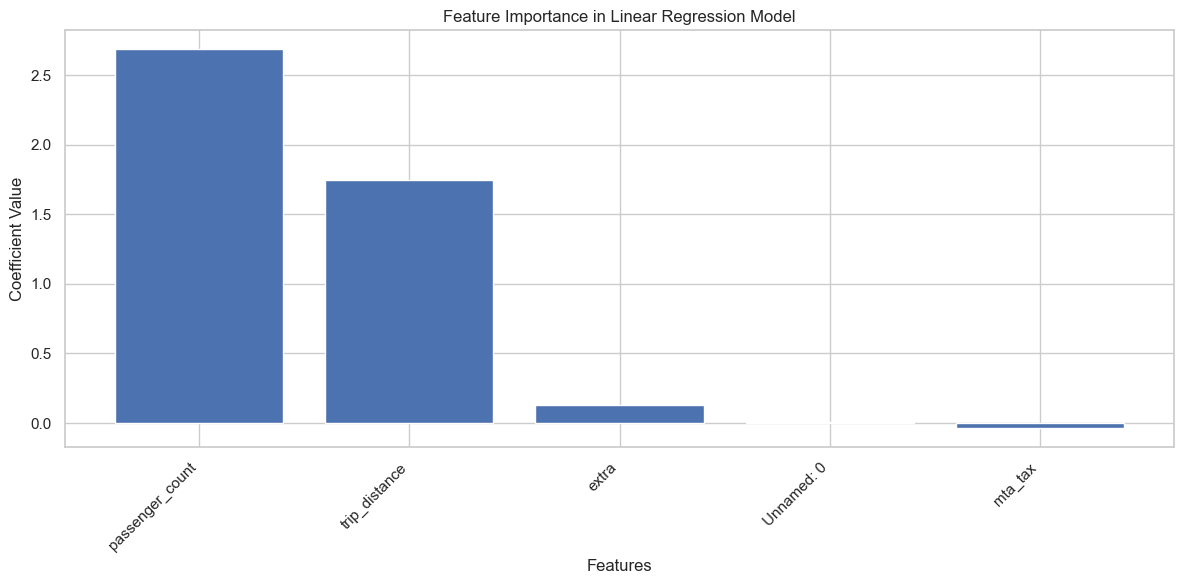


Feature Importance:
        feature  importance
passenger_count    2.684458
  trip_distance    1.749542
          extra    0.131876
     Unnamed: 0    0.006257
        mta_tax   -0.038344


In [69]:
# First, let's check the dimensions
print("Number of features (X.columns):", len(X.columns))
print("Number of coefficients (lr.coef_):", len(lr.coef_[0]))
print("\nFeatures:", list(X.columns))
print("\nCoefficients:", lr.coef_[0])

# Create lists first
features = list(X.columns)
importances = lr.coef_[0]

# Create DataFrame from zipped lists
feature_importance = pd.DataFrame(list(zip(features, importances)), 
                                columns=['feature', 'importance'])

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.tight_layout()
plt.show()

# Print the feature importance
print("\nFeature Importance:")
print(feature_importance.to_string(index=False))